Import the necessary packages required for analysis: pandas, numpy, matplotlib, seaborn.  
Also added snip allowing for graphics and plots to be embedded into the notebook. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read in csv data file.

In [4]:
df = pd.read_csv('data/flights.csv', low_memory=False)

Validating csv data file read in correctly.

In [5]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

Identifying null values.

In [7]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

Filtering out for only delayed and cancelled flights.
Calculating percentage of flights delayed and cancelled.

In [9]:
df_delays = df[df.ARRIVAL_DELAY > 15]
df_cancelled = df[~df.CANCELLATION_REASON.isnull()]

In [10]:
df_delays['ARRIVAL_DELAY'].count() / df['YEAR'].count() * 100

17.588659648717606

In [11]:
df_cancelled['CANCELLATION_REASON'].count() / df['YEAR'].count() * 100

1.5446430612129514

Viewing breakdown of what the type of delays contributed to late arrival.  Taking sum and count.

In [12]:
df_aggr_delays = df_delays[['DEPARTURE_DELAY','ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum()
df_aggr_delays

DEPARTURE_DELAY        57975005.0
ARRIVAL_DELAY          62052752.0
AIR_SYSTEM_DELAY       14068315.0
SECURITY_DELAY            79537.0
AIRLINE_DELAY          19998254.0
LATE_AIRCRAFT_DELAY    24816087.0
WEATHER_DELAY           3090559.0
dtype: float64

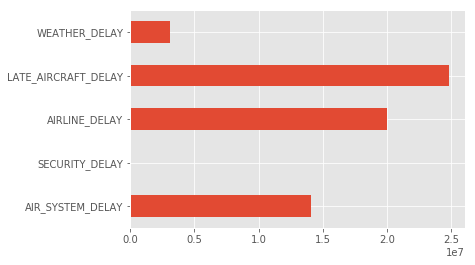

In [13]:
plt.style.use('ggplot')

df_aggr_delays[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].plot(kind='barh')

In [14]:
df_count_delays = df_delays[['DEPARTURE_DELAY','ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']][df_delays > 0].count()
df_count_delays

DEPARTURE_DELAY         921826
ARRIVAL_DELAY          1023498
AIR_SYSTEM_DELAY        541415
SECURITY_DELAY            3330
AIRLINE_DELAY           551793
LATE_AIRCRAFT_DELAY     542747
WEATHER_DELAY            63804
dtype: int64

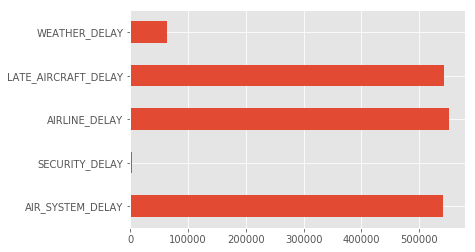

In [15]:
df_count_delays[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].plot(kind='barh')

Summary statistics on the type of delays.

In [16]:
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.2f}'.format
print(df_delays[['DEPARTURE_DELAY','ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].describe())

       DEPARTURE_DELAY  ARRIVAL_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
count       1023498.00     1023498.00        1023498.00      1023498.00   
mean             56.64          60.63             13.75            0.08   
std              67.91          64.89             28.48            2.18   
min             -32.00          16.00              0.00            0.00   
25%              19.00          24.00              0.00            0.00   
50%              39.00          39.00              2.00            0.00   
75%              72.00          72.00             18.00            0.00   
max            1988.00        1971.00           1134.00          573.00   

       AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
count     1023498.00           1023498.00     1023498.00  
mean           19.54                24.25           3.02  
std            48.99                43.84          20.82  
min             0.00                 0.00           0.00  
25%             0.00         

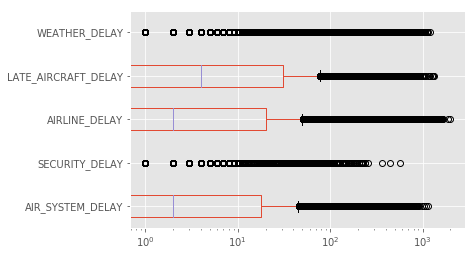

In [17]:
ax = df_delays[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].boxplot(vert=False)
ax.set_xscale('log')

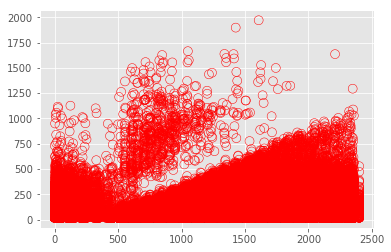

In [18]:
plt.scatter(df_delays['DEPARTURE_TIME'],df_delays['ARRIVAL_DELAY'], s=80, facecolors='none', edgecolors='r')
plt.show()

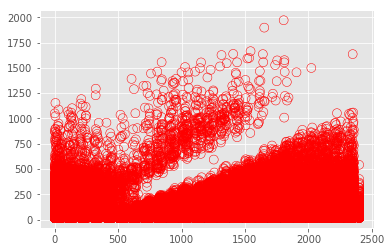

In [19]:
plt.scatter(df_delays['ARRIVAL_TIME'],df_delays['ARRIVAL_DELAY'], s=80, facecolors='none', edgecolors='r')
plt.show()

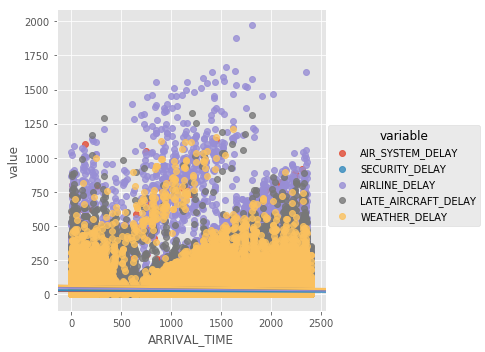

In [25]:
cmap = sns.diverging_palette(220,10,as_cmap=True)

df_delays_long = pd.melt(df_delays, id_vars=['ARRIVAL_TIME'], value_vars=['AIR_SYSTEM_DELAY','SECURITY_DELAY',
                                                                          'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY',
                                                                          'WEATHER_DELAY'])
sns.lmplot('ARRIVAL_TIME','value',data=df_delays_long[df_delays_long.value > 0],
           hue='variable')
plt.show()

In [1]:
df_delays_long.head()

NameError: name 'df_delays_long' is not defined